In [ ]:
#FKM FM YYT

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
iris=load_iris()

In [3]:
X=iris.data

In [4]:
y=iris.target

In [5]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
X=minmax.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,stratify=y)

In [16]:
from sklearn.cluster import KMeans
import numpy as np
from scipy.stats import mode
from sklearn.metrics import accuracy_score
resultados=pd.DataFrame(columns=["kmeans","entrena","test"])

In [17]:
for i,k in enumerate(range(2,8)):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X_train,y_train)
    etiquetas=kmeans.labels_
    moda=np.zeros(k)
    for a in range(k):
        similares=(etiquetas==a)
        argwhere=np.argwhere(similares)
        train_enc=y_train[argwhere]
        modaValor=mode(train_enc)[0]
        moda[a]=modaValor

        
    y_pred_train=moda[kmeans.predict(X_train)]
    y_pred_test=moda[kmeans.predict(X_test)]
    punt_ent=accuracy_score(y_pred_train,y_train)
    punt_test=accuracy_score(y_pred_test,y_test)
    resultados.loc[len(resultados)]=[k,punt_ent,punt_test]


c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_16440\3549933031.py:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  modaValor=mode(train_enc)[0]
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_ini

In [18]:
resultados

,kmeans,entrena,test
0,2.0,0.67,0.66
1,3.0,0.85,0.96
2,4.0,0.86,0.86
3,5.0,0.86,0.84
4,6.0,0.87,0.94
5,7.0,0.96,0.96


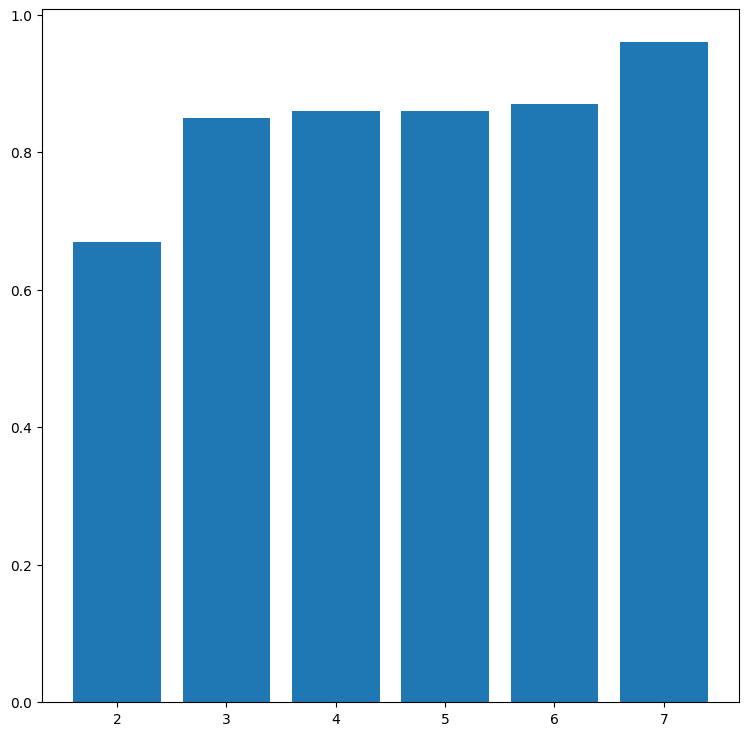

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
plt.bar(resultados["kmeans"],resultados["entrena"])
plt.show()

In [20]:
maximo=resultados["entrena"].max()
print(maximo)

0.96


In [23]:
maximo=resultados["entrena"].idxmax()
print(resultados.loc[maximo].kmeans)

7.0
